1. Perform EDA and do any data preprocessing required (especially handle imbalance in the dataset)

In [30]:
import pandas  as pd
credit_card_data=pd.read_excel('/content/CreditCardDataset.xlsx')
credit_card_data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
1,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
2,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
3,11,1.069374,0.287722,0.828613,2.712520,-0.178398,0.337544,-0.096717,0.115982,-0.221083,...,-0.036876,0.074412,-0.071407,0.104744,0.548265,0.104094,0.021491,0.021293,27.50,0
4,12,-0.752417,0.345485,2.057323,-1.468643,-1.158394,-0.077850,-0.608581,0.003603,-0.436167,...,0.499625,1.353650,-0.256573,-0.065084,-0.039124,-0.087086,-0.180998,0.129394,15.99,0


In [31]:
credit_card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no missing values to handle

In [49]:

list(set(credit_card_data.columns) - set(credit_card_data._get_numeric_data().columns))

[]

All columns are numerical columns

In [33]:
credit_card_data2 = credit_card_data[credit_card_data.duplicated()]

There are no duplicated rows

## **Heat Map**

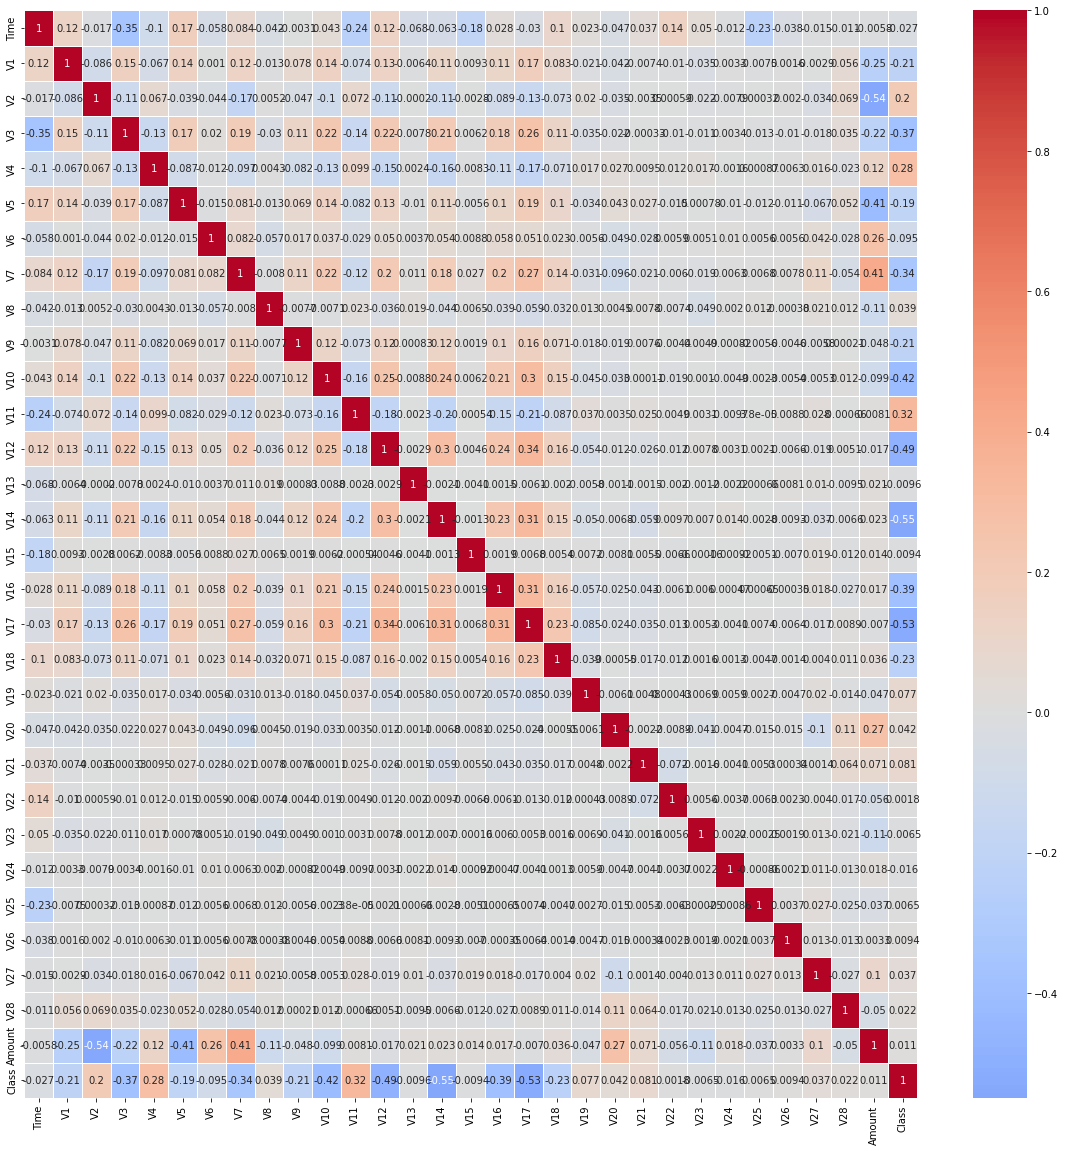

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(credit_card_data.corr(),annot=True,linewidth=0.9,center=0,cmap='coolwarm')
plt.show()

handle imbalance

Text(0.5, 1.0, 'Class Imbalance')

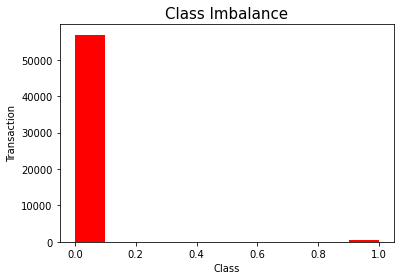

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(credit_card_data['Class'], color='red')
plt.xlabel('Class')
plt.ylabel('Transaction')
plt.title('Class Imbalance', fontsize=15)

In [36]:
pc_fraud_data = len(credit_card_data.loc[credit_card_data['Class'] == 1].values)/len(credit_card_data.loc[credit_card_data['Class'] == 0].values)
print(pc_fraud_data*100)
print(credit_card_data.head())

0.8652375006594798
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
1     2 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
2     7 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
3    11  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544 -0.096717   
4    12 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850 -0.608581   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
1  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427 -0.232794   
2 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709 -0.415267   
3  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744  0.548265   
4  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084 -0.039124   

        V26  

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from collections import Counter

x = credit_card_data.drop('Class', axis=1).values
y = credit_card_data['Class'].values
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

print('Sampled train dataset shape %s' % Counter(y_train))
print('Sampled validation dataset shape %s' % Counter(y_test))


Sampled train dataset shape Counter({0: 45494, 1: 390})
Sampled validation dataset shape Counter({0: 11369, 1: 102})


Handling Resample

In [38]:
from sklearn.model_selection import train_test_split
import torch 
import torchvision
import torchvision.transforms as transforms 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import torchvision.datasets as datasets 
from tqdm import tqdm
import numpy as np

In [39]:
batch_size = 128

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
import numpy as np
y = credit_card_data.Class
X = credit_card_data.drop('Class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)

dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

print('predicted labels unique: ', (np.unique(dummy_pred)))

print('Accuracy: ', accuracy_score(y_test, dummy_pred))

predicted labels unique:  [0]
Accuracy:  0.9918054223694533


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print(str(accuracy_score(y_test, lr_pred))+"Accuracy")
prediction_arrs = pd.DataFrame(lr_pred)
print(prediction_arrs[0].value_counts())

0.9952924766803243Accuracy
0    11411
1       60
Name: 0, dtype: int64


In [42]:
from sklearn.metrics import f1_score
f1_score(y_test, lr_pred)

0.6493506493506493

In [43]:
from sklearn.metrics import recall_score
recall_score(y_test, lr_pred)

0.5319148936170213

In [44]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
accuracy_score(y_test, rfc_pred)

0.997733414697934

In [45]:
f1_score(y_test, rfc_pred)

0.8470588235294116

In [46]:
recall_score(y_test, rfc_pred)

0.7659574468085106

In [47]:
from sklearn.utils import resample
y = credit_card_data.Class
X = credit_card_data.drop('Class', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=54)
X = pd.concat([X_train, y_train], axis=1)
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]
fraud_upsampled = resample(fraud,
                          replace=True, 
                          n_samples=len(not_fraud),
                          random_state=54)

upsampled = pd.concat([not_fraud, fraud_upsampled])

upsampled.Class.value_counts()

0    45486
1    45486
Name: Class, dtype: int64

In [48]:
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)
upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)
accuracy_score(y_test, upsampled_pred)

0.9753290907505885

In [ ]:
f1_score(y_test, upsampled_pred)

Building Neural Network

In [20]:
from sklearn.model_selection import train_test_split
import torch 
import torchvision
import torchvision.transforms as transforms 
import torch.nn as nn 
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils
import torchvision.datasets as datasets 
from tqdm import tqdm

In [22]:
import numpy as np
batch_size = 128
target = torch.tensor(credit_card_data['Class'].values.astype(np.float32))
feature = torch.tensor(credit_card_data.drop(['Time','Class'], axis = 1).values.astype(np.float32))
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=42)

In [23]:
train_tensor = data_utils.TensorDataset(X_train, y_train) 
train_dataloader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)
test_tensor = data_utils.TensorDataset(X_test, y_test) 
test_dataloader = data_utils.DataLoader(dataset = test_tensor, batch_size = batch_size, shuffle = True)

In [24]:
print(len(train_dataloader))

314


In [25]:
feature_no = 29
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(29, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128,512)
        self.fc4 = nn.Linear(512, 128)
        self.fc5 = nn.Linear(128,16)
        self.fc6 = nn.Linear(16,1)

        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = torch.sigmoid(self.fc6(x))
        return x

In [26]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
learning_rate = 1e-5

model = Net().to(device)

print(model)
criterion = nn.BCELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 


Net(
  (fc1): Linear(in_features=29, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=512, bias=True)
  (fc4): Linear(in_features=512, out_features=128, bias=True)
  (fc5): Linear(in_features=128, out_features=16, bias=True)
  (fc6): Linear(in_features=16, out_features=1, bias=True)
)


In [27]:
num_epochs = 100
prediction_arr = []
train_losses_arr = []
valid_losses_arr = []
train_acc_arr = []
valid_acc_arr = []
for epoch in range(1, num_epochs + 1):
    prediction_arr=[]
    actual_result = []
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    processed = 0
    total_test = 0
    processed_test = 0
    model.train().to(device)
    for data, target in tqdm(train_dataloader):
        data = data.to(device)
        target = torch.squeeze(target)
        target = target.to(device)
        optimizer.zero_grad()
        output = model(data).to(device)
        output = torch.squeeze(output)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()* data.size(0)
        predict=torch.round(output)
        actual_result=(target)
        correct = 0
        for i in range(len(data)):
              if predict[i]==actual_result[i]:
                correct=correct+1
        processed += len(data)
        total = total+correct
    model.eval()
    with torch.no_grad():
        for data, target in (test_dataloader):
            data = data.to(device)
            target = torch.squeeze(target)
            target = target.to(device)
            output = model(data).to(device)
            output = torch.squeeze(output)        
            loss = criterion(output, target)
            valid_loss += loss.item() * data.size(0)
            pred_test = torch.round(output)
            actual_result_test = target
            correct = 0
            for i in range(len(data)):
                  if pred_test[i]==actual_result_test[i]:
                    correct=correct+1
            processed_test += len(data)
            total_test = total_test+correct  
    train_loss = train_loss/len(train_dataloader.sampler)
    valid_loss = valid_loss/len(test_dataloader.sampler)
    train_losses_arr.append(train_loss)
    valid_losses_arr.append(valid_loss)
    train_acc_arruracy = total/processed
    train_acc_arr.append(train_acc_arruracy)
    test_accuracy = total_test/processed_test
    valid_acc_arr.append(test_accuracy)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}\tTraining Accuracy: {:.6f}\tTesting Accuracy: {:.6f}'.format(
        epoch, train_loss, valid_loss, train_acc_arruracy,test_accuracy))

100%|██████████| 314/314 [00:03<00:00, 82.52it/s]


Epoch: 1 	Training Loss: 0.506958 	Validation Loss: 0.396908	Training Accuracy: 0.869583	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:03<00:00, 97.42it/s] 


Epoch: 2 	Training Loss: 0.338401 	Validation Loss: 0.254947	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:03<00:00, 85.79it/s]


Epoch: 3 	Training Loss: 0.263555 	Validation Loss: 0.210710	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:03<00:00, 88.47it/s]


Epoch: 4 	Training Loss: 0.240516 	Validation Loss: 0.200918	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:02<00:00, 105.40it/s]


Epoch: 5 	Training Loss: 0.233120 	Validation Loss: 0.190822	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:03<00:00, 84.12it/s]


Epoch: 6 	Training Loss: 0.216993 	Validation Loss: 0.177157	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:03<00:00, 104.43it/s]


Epoch: 7 	Training Loss: 0.201056 	Validation Loss: 0.152175	Training Accuracy: 0.991008	Testing Accuracy: 0.992387


100%|██████████| 314/314 [00:02<00:00, 108.31it/s]


Epoch: 8 	Training Loss: 0.170679 	Validation Loss: 0.121108	Training Accuracy: 0.991980	Testing Accuracy: 0.994537


100%|██████████| 314/314 [00:02<00:00, 104.97it/s]


Epoch: 9 	Training Loss: 0.124377 	Validation Loss: 0.063207	Training Accuracy: 0.994122	Testing Accuracy: 0.996281


100%|██████████| 314/314 [00:03<00:00, 97.52it/s] 


Epoch: 10 	Training Loss: 0.055481 	Validation Loss: 0.030132	Training Accuracy: 0.996413	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:02<00:00, 108.85it/s]


Epoch: 11 	Training Loss: 0.031489 	Validation Loss: 0.021950	Training Accuracy: 0.997385	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:03<00:00, 100.08it/s]


Epoch: 12 	Training Loss: 0.023175 	Validation Loss: 0.019179	Training Accuracy: 0.997584	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:04<00:00, 64.15it/s]


Epoch: 13 	Training Loss: 0.019722 	Validation Loss: 0.017788	Training Accuracy: 0.997758	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:03<00:00, 84.44it/s]


Epoch: 14 	Training Loss: 0.019345 	Validation Loss: 0.016301	Training Accuracy: 0.997584	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:04<00:00, 70.12it/s]


Epoch: 15 	Training Loss: 0.017093 	Validation Loss: 0.015234	Training Accuracy: 0.997758	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:02<00:00, 108.28it/s]


Epoch: 16 	Training Loss: 0.016270 	Validation Loss: 0.015008	Training Accuracy: 0.997708	Testing Accuracy: 0.997559


100%|██████████| 314/314 [00:02<00:00, 109.74it/s]


Epoch: 17 	Training Loss: 0.014888 	Validation Loss: 0.014322	Training Accuracy: 0.997833	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:03<00:00, 90.19it/s]


Epoch: 18 	Training Loss: 0.014540 	Validation Loss: 0.013983	Training Accuracy: 0.997982	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 103.31it/s]


Epoch: 19 	Training Loss: 0.021533 	Validation Loss: 0.013079	Training Accuracy: 0.997708	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 95.66it/s]


Epoch: 20 	Training Loss: 0.013418 	Validation Loss: 0.012824	Training Accuracy: 0.998007	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:04<00:00, 68.27it/s]


Epoch: 21 	Training Loss: 0.013275 	Validation Loss: 0.012465	Training Accuracy: 0.998007	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 107.94it/s]


Epoch: 22 	Training Loss: 0.012904 	Validation Loss: 0.012467	Training Accuracy: 0.998032	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 103.01it/s]


Epoch: 23 	Training Loss: 0.016559 	Validation Loss: 0.012908	Training Accuracy: 0.997858	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:05<00:00, 58.66it/s] 


Epoch: 24 	Training Loss: 0.012378 	Validation Loss: 0.012111	Training Accuracy: 0.998007	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 112.56it/s]


Epoch: 25 	Training Loss: 0.012258 	Validation Loss: 0.011758	Training Accuracy: 0.997958	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:02<00:00, 111.38it/s]


Epoch: 26 	Training Loss: 0.011842 	Validation Loss: 0.011598	Training Accuracy: 0.998057	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 101.01it/s]


Epoch: 27 	Training Loss: 0.012034 	Validation Loss: 0.011665	Training Accuracy: 0.997933	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 80.64it/s] 


Epoch: 28 	Training Loss: 0.011442 	Validation Loss: 0.011471	Training Accuracy: 0.998032	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 109.06it/s]


Epoch: 29 	Training Loss: 0.011336 	Validation Loss: 0.011380	Training Accuracy: 0.998007	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 101.36it/s]


Epoch: 30 	Training Loss: 0.011391 	Validation Loss: 0.011649	Training Accuracy: 0.998007	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 89.54it/s] 


Epoch: 31 	Training Loss: 0.011520 	Validation Loss: 0.013169	Training Accuracy: 0.997933	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:02<00:00, 107.60it/s]


Epoch: 32 	Training Loss: 0.011571 	Validation Loss: 0.011097	Training Accuracy: 0.997982	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 106.70it/s]


Epoch: 33 	Training Loss: 0.010853 	Validation Loss: 0.011063	Training Accuracy: 0.997933	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 86.27it/s] 


Epoch: 34 	Training Loss: 0.014923 	Validation Loss: 0.023122	Training Accuracy: 0.997808	Testing Accuracy: 0.997617


100%|██████████| 314/314 [00:02<00:00, 107.16it/s]


Epoch: 35 	Training Loss: 0.014434 	Validation Loss: 0.011025	Training Accuracy: 0.997883	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 80.18it/s]


Epoch: 36 	Training Loss: 0.010690 	Validation Loss: 0.013210	Training Accuracy: 0.997982	Testing Accuracy: 0.997675


100%|██████████| 314/314 [00:03<00:00, 86.39it/s]


Epoch: 37 	Training Loss: 0.010431 	Validation Loss: 0.012062	Training Accuracy: 0.998007	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:03<00:00, 83.32it/s]


Epoch: 38 	Training Loss: 0.011634 	Validation Loss: 0.011329	Training Accuracy: 0.997908	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:02<00:00, 111.16it/s]


Epoch: 39 	Training Loss: 0.010353 	Validation Loss: 0.010903	Training Accuracy: 0.997982	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 85.96it/s]


Epoch: 40 	Training Loss: 0.011029 	Validation Loss: 0.010860	Training Accuracy: 0.997883	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:04<00:00, 70.92it/s]


Epoch: 41 	Training Loss: 0.011292 	Validation Loss: 0.015136	Training Accuracy: 0.997933	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:02<00:00, 108.43it/s]


Epoch: 42 	Training Loss: 0.011342 	Validation Loss: 0.010790	Training Accuracy: 0.997933	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 87.93it/s] 


Epoch: 43 	Training Loss: 0.009969 	Validation Loss: 0.010735	Training Accuracy: 0.998032	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 109.17it/s]


Epoch: 44 	Training Loss: 0.010133 	Validation Loss: 0.010702	Training Accuracy: 0.998007	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 107.92it/s]


Epoch: 45 	Training Loss: 0.012007 	Validation Loss: 0.011673	Training Accuracy: 0.997883	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:03<00:00, 87.65it/s]


Epoch: 46 	Training Loss: 0.010252 	Validation Loss: 0.010708	Training Accuracy: 0.998032	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 109.32it/s]


Epoch: 47 	Training Loss: 0.010123 	Validation Loss: 0.011130	Training Accuracy: 0.997933	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 108.92it/s]


Epoch: 48 	Training Loss: 0.010009 	Validation Loss: 0.010875	Training Accuracy: 0.998057	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 107.69it/s]


Epoch: 49 	Training Loss: 0.009607 	Validation Loss: 0.010987	Training Accuracy: 0.998082	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 93.95it/s] 


Epoch: 50 	Training Loss: 0.009952 	Validation Loss: 0.010607	Training Accuracy: 0.998032	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 108.19it/s]


Epoch: 51 	Training Loss: 0.009863 	Validation Loss: 0.010768	Training Accuracy: 0.998082	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 108.22it/s]


Epoch: 52 	Training Loss: 0.009760 	Validation Loss: 0.010863	Training Accuracy: 0.998082	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:03<00:00, 87.19it/s] 


Epoch: 53 	Training Loss: 0.009870 	Validation Loss: 0.010566	Training Accuracy: 0.998082	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 110.40it/s]


Epoch: 54 	Training Loss: 0.009801 	Validation Loss: 0.011176	Training Accuracy: 0.998032	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:03<00:00, 91.20it/s]


Epoch: 55 	Training Loss: 0.009702 	Validation Loss: 0.021699	Training Accuracy: 0.997982	Testing Accuracy: 0.997733


100%|██████████| 314/314 [00:03<00:00, 88.25it/s]


Epoch: 56 	Training Loss: 0.010971 	Validation Loss: 0.010450	Training Accuracy: 0.997982	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 109.57it/s]


Epoch: 57 	Training Loss: 0.010479 	Validation Loss: 0.010683	Training Accuracy: 0.998032	Testing Accuracy: 0.997850


100%|██████████| 314/314 [00:02<00:00, 108.45it/s]


Epoch: 58 	Training Loss: 0.009537 	Validation Loss: 0.010675	Training Accuracy: 0.998057	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 100.97it/s]


Epoch: 59 	Training Loss: 0.009276 	Validation Loss: 0.010921	Training Accuracy: 0.998007	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:04<00:00, 66.12it/s]


Epoch: 60 	Training Loss: 0.009237 	Validation Loss: 0.010646	Training Accuracy: 0.998157	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 110.57it/s]


Epoch: 61 	Training Loss: 0.009346 	Validation Loss: 0.010762	Training Accuracy: 0.998057	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 93.39it/s]


Epoch: 62 	Training Loss: 0.017282 	Validation Loss: 0.012203	Training Accuracy: 0.997684	Testing Accuracy: 0.997792


100%|██████████| 314/314 [00:02<00:00, 111.24it/s]


Epoch: 63 	Training Loss: 0.009719 	Validation Loss: 0.010377	Training Accuracy: 0.998132	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:03<00:00, 88.02it/s]


Epoch: 64 	Training Loss: 0.009294 	Validation Loss: 0.010592	Training Accuracy: 0.998157	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:03<00:00, 101.72it/s]


Epoch: 65 	Training Loss: 0.009042 	Validation Loss: 0.010541	Training Accuracy: 0.998157	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:03<00:00, 99.61it/s] 


Epoch: 66 	Training Loss: 0.008819 	Validation Loss: 0.010602	Training Accuracy: 0.998207	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:02<00:00, 110.23it/s]


Epoch: 67 	Training Loss: 0.008958 	Validation Loss: 0.010402	Training Accuracy: 0.998157	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:02<00:00, 108.97it/s]


Epoch: 68 	Training Loss: 0.008659 	Validation Loss: 0.010345	Training Accuracy: 0.998157	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:04<00:00, 70.49it/s]


Epoch: 69 	Training Loss: 0.009109 	Validation Loss: 0.010265	Training Accuracy: 0.998256	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 106.31it/s]


Epoch: 70 	Training Loss: 0.009337 	Validation Loss: 0.010548	Training Accuracy: 0.998281	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 110.51it/s]


Epoch: 71 	Training Loss: 0.010829 	Validation Loss: 0.010741	Training Accuracy: 0.998107	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:03<00:00, 90.60it/s]


Epoch: 72 	Training Loss: 0.008636 	Validation Loss: 0.010998	Training Accuracy: 0.998306	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 107.83it/s]


Epoch: 73 	Training Loss: 0.011848 	Validation Loss: 0.010273	Training Accuracy: 0.998232	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 107.06it/s]


Epoch: 74 	Training Loss: 0.008538 	Validation Loss: 0.012150	Training Accuracy: 0.998306	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:03<00:00, 85.67it/s]


Epoch: 75 	Training Loss: 0.009345 	Validation Loss: 0.010211	Training Accuracy: 0.998331	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 107.17it/s]


Epoch: 76 	Training Loss: 0.008381 	Validation Loss: 0.010289	Training Accuracy: 0.998381	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 88.50it/s] 


Epoch: 77 	Training Loss: 0.008882 	Validation Loss: 0.010177	Training Accuracy: 0.998356	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 90.80it/s]


Epoch: 78 	Training Loss: 0.008760 	Validation Loss: 0.010812	Training Accuracy: 0.998406	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 106.85it/s]


Epoch: 79 	Training Loss: 0.008576 	Validation Loss: 0.010195	Training Accuracy: 0.998406	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 108.14it/s]


Epoch: 80 	Training Loss: 0.008960 	Validation Loss: 0.010245	Training Accuracy: 0.998331	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 81.35it/s]


Epoch: 81 	Training Loss: 0.009163 	Validation Loss: 0.010318	Training Accuracy: 0.998281	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 82.43it/s] 


Epoch: 82 	Training Loss: 0.008550 	Validation Loss: 0.010752	Training Accuracy: 0.998406	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 109.02it/s]


Epoch: 83 	Training Loss: 0.011441 	Validation Loss: 0.010537	Training Accuracy: 0.998256	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 107.11it/s]


Epoch: 84 	Training Loss: 0.008522 	Validation Loss: 0.010197	Training Accuracy: 0.998406	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 94.00it/s] 


Epoch: 85 	Training Loss: 0.008759 	Validation Loss: 0.010166	Training Accuracy: 0.998331	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 85.81it/s]


Epoch: 86 	Training Loss: 0.008386 	Validation Loss: 0.010817	Training Accuracy: 0.998381	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:05<00:00, 57.45it/s] 


Epoch: 87 	Training Loss: 0.008641 	Validation Loss: 0.010478	Training Accuracy: 0.998356	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 110.54it/s]


Epoch: 88 	Training Loss: 0.008466 	Validation Loss: 0.010197	Training Accuracy: 0.998356	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 107.46it/s]


Epoch: 89 	Training Loss: 0.008491 	Validation Loss: 0.010221	Training Accuracy: 0.998381	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:05<00:00, 62.04it/s]


Epoch: 90 	Training Loss: 0.014647 	Validation Loss: 0.016649	Training Accuracy: 0.998232	Testing Accuracy: 0.997908


100%|██████████| 314/314 [00:02<00:00, 106.92it/s]


Epoch: 91 	Training Loss: 0.010609 	Validation Loss: 0.010387	Training Accuracy: 0.998406	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:02<00:00, 107.26it/s]


Epoch: 92 	Training Loss: 0.008461 	Validation Loss: 0.010148	Training Accuracy: 0.998381	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:03<00:00, 90.47it/s]


Epoch: 93 	Training Loss: 0.008291 	Validation Loss: 0.010412	Training Accuracy: 0.998406	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 108.28it/s]


Epoch: 94 	Training Loss: 0.008233 	Validation Loss: 0.010686	Training Accuracy: 0.998431	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 92.79it/s] 


Epoch: 95 	Training Loss: 0.008195 	Validation Loss: 0.010087	Training Accuracy: 0.998431	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 93.07it/s]


Epoch: 96 	Training Loss: 0.009370 	Validation Loss: 0.013468	Training Accuracy: 0.998306	Testing Accuracy: 0.997966


100%|██████████| 314/314 [00:04<00:00, 73.73it/s]


Epoch: 97 	Training Loss: 0.008663 	Validation Loss: 0.010761	Training Accuracy: 0.998381	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 107.10it/s]


Epoch: 98 	Training Loss: 0.008442 	Validation Loss: 0.010478	Training Accuracy: 0.998456	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:03<00:00, 86.06it/s]


Epoch: 99 	Training Loss: 0.008107 	Validation Loss: 0.010616	Training Accuracy: 0.998481	Testing Accuracy: 0.998024


100%|██████████| 314/314 [00:02<00:00, 108.36it/s]


Epoch: 100 	Training Loss: 0.008282 	Validation Loss: 0.010484	Training Accuracy: 0.998506	Testing Accuracy: 0.998024


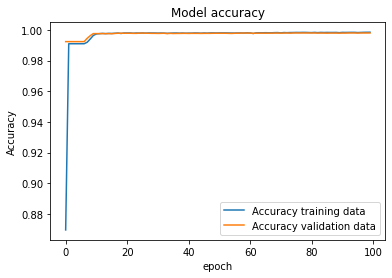

In [28]:
plt.plot(train_acc_arr, label='Accuracy training data')
plt.plot(valid_acc_arr, label='Accuracy validation data')
plt.legend()
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.show()

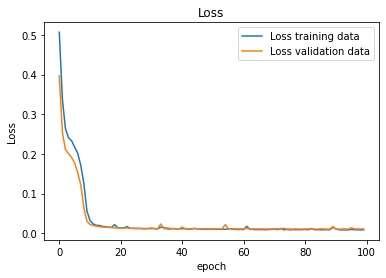

In [29]:
plt.plot(train_losses_arr, label='Loss training data')
plt.plot(valid_losses_arr, label='Loss validation data')
plt.legend()
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

Since overfitting is identified, we had to downsample the majority  and upsample the minority.